In [27]:
import os
import time
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [14]:
# create a query topic
query = 'impedance'

# create API URL to request
url_start = r'http://export.arxiv.org/api/query?search_query=all'
url_end = r':{}&start=0&max_results=10000'.format(query)
url = url_start + url_end

# get response from URL, decode it, and remove new line characters
response = urllib.request.urlopen(url).read()
response = response.decode().replace('\n', '')

# create the HTML parser
soup = BeautifulSoup(response, 'html.parser')

# extract publication information from HTML
titles = [i.get_text() for i in soup.find_all('title')][1:]
summaries = [i.get_text().lstrip() for i in soup.find_all('summary')]
years = [int(i.get_text().split('-')[0]) for i in soup.find_all('published')]
print('Found {} acticles using "{}" query'.format(len(titles), query))

Found 3499 acticles using "impedance" query


In [15]:
df = pd.DataFrame()
df['title'] = titles
df['year'] = years
df['summary'] = summaries

In [16]:
df

,title,year,summary
0,Mixer-First Receiver with wide-RF Range,2019,"In the Passive Mixer first receiver, four mosf..."
1,Complex impedance measurements of calorimeters...,2007,Impedance measurements provide a useful probe ...
2,Impedance of a sphere oscillating in an elasti...,2006,The dynamic impedance of a sphere oscillating ...
3,Exact Green's functions and Bosonization of a ...,2007,The exact Green's functions of a finite-size L...
4,Random scattering by rough surfaces with spati...,2019,A method is given for evaluating electromagnet...
...,...,...,...
3494,Tuning the Exo-Space Weather Radio for Stellar...,2020,Coronal mass ejections (CMEs) on stars other t...
3495,Vibroacoustics of the piano soundboard: Reduce...,2013,"In string musical instruments, the sound is ra..."
3496,3-D Magnetotelluric Investigations for geother...,2015,Within the framework of a global French progra...
3497,Search-based Tier Assignment for Optimising Of...,2017,Web programmers are often faced with several c...


In [30]:
# save dataframe to file

export_time = time.strftime('%Y-%m-%d_%H-%M')
export_filepath = os.path.join(
    os.getcwd(), query+'__arxiv_query_'+export_time+'.txt')
df.to_csv(export_filepath, index=False, sep='\t')

In [ ]:
'''
summary = re.search('<summary>(.+?)</summary>', text)
if summary:
    print(summary.group(1).lstrip())
else:
    print('No summary tag found.')
    summary = ''
'''
    

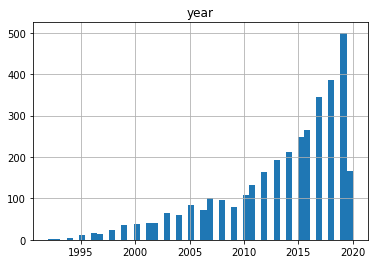

In [21]:
df.hist(column='year', bins=50)
plt.show()

In [ ]:
#print(soup.prettify())